# **1. Знайомство з набором даних**

In [1]:
import numpy as np
data=np.genfromtxt('points2D_2classes.csv',delimiter=',',skip_header=1)
print (data, data.shape)

X=np.array(data[:,:2])
y=np.array(data[:,2]).astype(int)
X.dtype, y.dtype
print (np.unique(y, return_counts=1))

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))


plt.scatter(data[:,0],data[:,1], c=y, cmap='jet', alpha=0.7, edgecolors='k')
#plt.scatter(class1[:,0],class1[:,1], c='blue', cmap='jet', alpha=0.7, edgecolors='k')


OSError: ignored

#**2. Розбиття набору даних на навчальну і тестову вибірки**

0.3 0.7


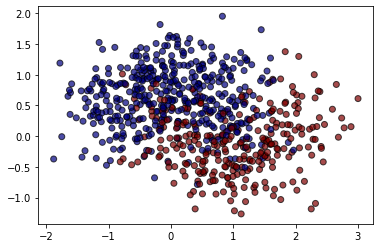

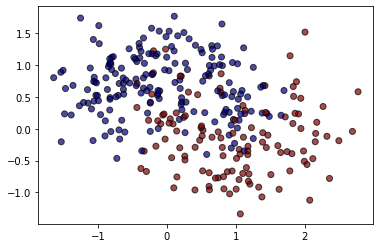

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(len(y_test)/len(y),len(y_train)/len(y))

plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap='jet', alpha=0.7, edgecolors='k')
plt.show()
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap='jet', alpha=0.7, edgecolors='k')

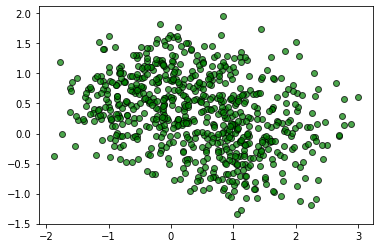

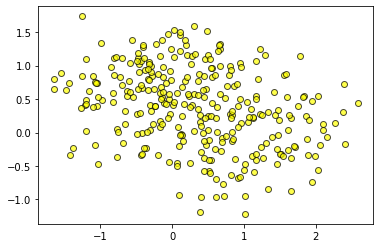

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
plt.scatter(X_train[:,0],X_train[:,1], c='g', cmap='jet', alpha=0.7, edgecolors='k')
plt.show()
plt.scatter(X_test[:,0],X_test[:,1], c='yellow', cmap='jet', alpha=0.7, edgecolors='k')

#**3.  Побудова лінійного бінарного класифікатора на основі одношарового персептрона**

CPU times: user 3.42 ms, sys: 0 ns, total: 3.42 ms
Wall time: 6.59 ms


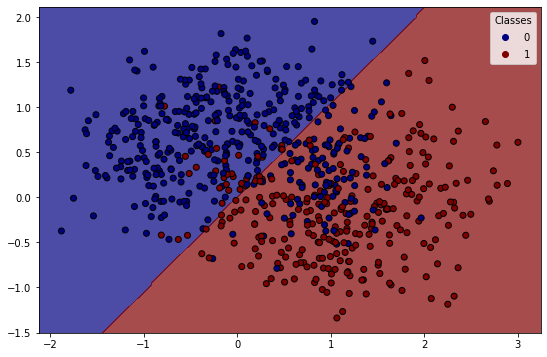

Точність класифікатора: 0.7985714285714286
Навчальна вибірка: 0.7985714285714286
Тестова вибірка: 0.7766666666666666


In [ ]:
from IPython.core.pylabtools import figsize
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from AI_labs import decision_surface
clf=Perceptron()
%time clf.fit(X_train, y_train)
clf.predict([[2.27551541,  0.14403283], [-1.36358516,  0.46172882],[-1, 1], [1,-1]])
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')

CPU times: user 1.55 ms, sys: 0 ns, total: 1.55 ms
Wall time: 1.56 ms


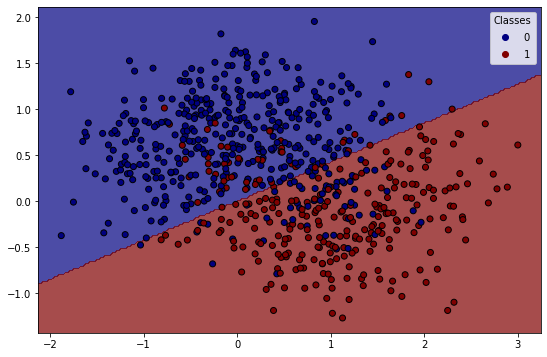

Точність класифікатора: 0.8385714285714285
Навчальна вибірка: 0.8385714285714285
Тестова вибірка: 0.8233333333333334


In [ ]:

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from AI_labs import decision_surface
clf=Perceptron(shuffle=True, random_state=None)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')

#**4. Побудова нелінійного багатошарового класифікатора на основі багатошарового персептрона**

CPU times: user 150 ms, sys: 201 ms, total: 351 ms
Wall time: 256 ms


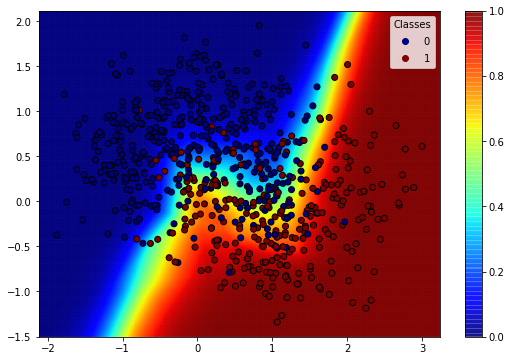

Точність класифікатора: 0.8728571428571429
Навчальна вибірка: 0.8728571428571429
Тестова вибірка: 0.8766666666666667


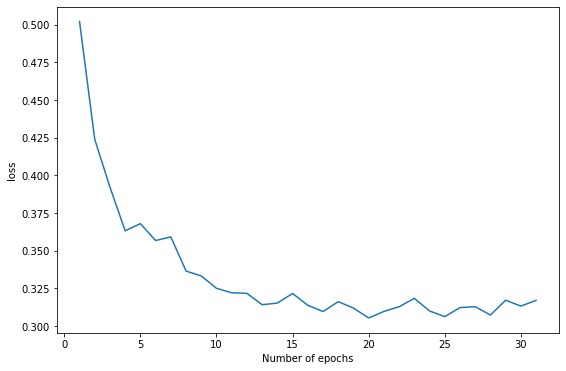

In [ ]:
from IPython.core.pylabtools import figsize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from AI_labs import decision_surface, learning_curve
clf=MLPClassifier(hidden_layer_sizes=[100], max_iter=1000, learning_rate_init=0.1)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train, proba=True)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')
plt.figure(figsize=(9,6))
learning_curve(clf)


In [ ]:
clf.predict_proba([[2.27551541,  0.14403283], [-1.36358516,  0.46172882],[-1, 1], [1,-1]])

array([[0.10735608, 0.89264392],
       [0.6464976 , 0.3535024 ],
       [0.64318018, 0.35681982],
       [0.32415331, 0.67584669]])

#**5. Явище перенавчання прогнозуючої моделі та метод ранньої зупинки навчання нейронної мережі (на прикладі багатошарового персептрона)**

In [ ]:
from IPython.core.pylabtools import figsize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from AI_labs import decision_surface, learning_curve
clf=MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, learning_rate_init=0.01, n_iter_no_change=1000)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train, proba=False)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')
plt.figure(figsize=(9,6))
learning_curve(clf)

NameError: ignored

#**6. Оптимізація моделі багатошарового персептрона шляхом підбору гіперпараметрів (cпрощений некоректний метод)**

CPU times: user 7.82 s, sys: 0 ns, total: 7.82 s
Wall time: 8.11 s


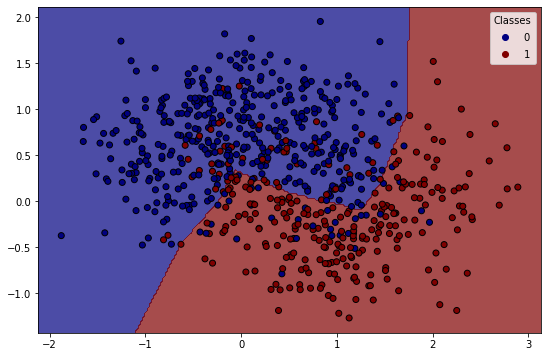

Точність класифікатора: 0.8714285714285714
Навчальна вибірка: 0.8714285714285714
Тестова вибірка: 0.87


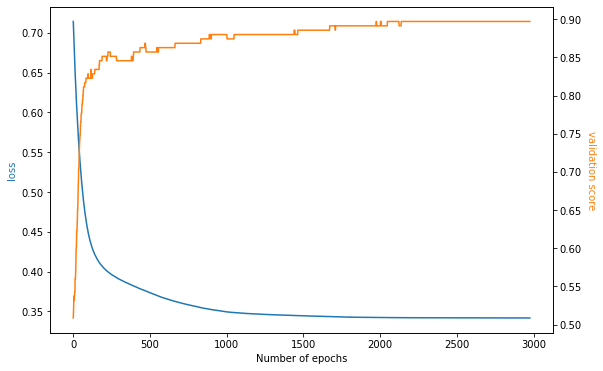

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=8)

clf=MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, learning_rate_init=0.001, n_iter_no_change=1000,early_stopping=True,validation_fraction=0.25)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train, proba=False)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')
plt.figure(figsize=(9,6))
learning_curve(clf)

CPU times: user 2.79 s, sys: 2.26 s, total: 5.05 s
Wall time: 2.6 s


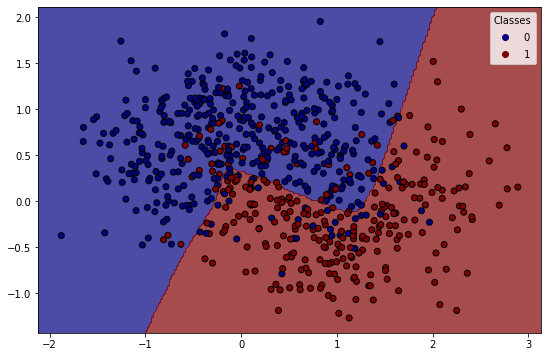

Точність класифікатора: 0.8714285714285714
Навчальна вибірка: 0.8714285714285714
Тестова вибірка: 0.8666666666666667


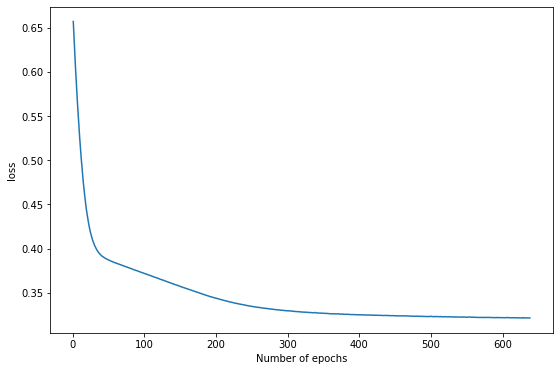

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=8)

clf=MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, learning_rate_init=0.001, learning_rate='constant', tol=1e-5, random_state=0)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train, proba=False)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')
plt.figure(figsize=(9,6))
learning_curve(clf)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


CPU times: user 5.16 s, sys: 0 ns, total: 5.16 s
Wall time: 5.46 s


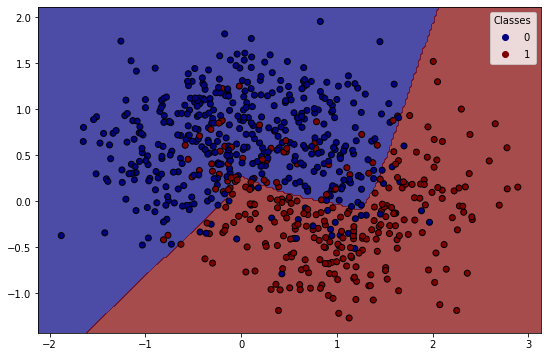

Точність класифікатора: 0.8685714285714285
Навчальна вибірка: 0.8685714285714285
Тестова вибірка: 0.8766666666666667


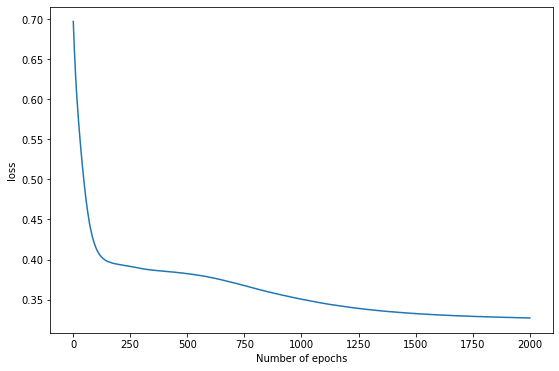

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=8)

clf=MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, learning_rate_init=0.001, n_iter_no_change=2000, learning_rate='adaptive', tol=1e-8, random_state=0)
%time clf.fit(X_train, y_train)
plt.figure(figsize=(9,6))
decision_surface(clf, X_train, y_train, proba=False)
y_pred=clf.predict(X_train)
print(f'Точність класифікатора: {np.sum(np.equal(y_train, y_pred)) / len(y_train)}')

print(f'Навчальна вибірка: {clf.score(X_train,y_train)}')
print(f'Тестова вибірка: {clf.score(X_test,y_test)}')
plt.figure(figsize=(9,6))
learning_curve(clf)